In [1]:
import numpy as np
import polars as pl
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive                       #This is to import the datasets which are uploaded to Google drive
drive.mount('/content/drive')
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import tracemalloc

Mounted at /content/drive


In [2]:
Df = pl.read_csv('/content/drive/MyDrive/Datasets/US Accidents/US_Accidents_March23.csv',n_rows = 1000500)

In [3]:
Df.head(5)

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""","""2016-02-08 11:00:00""",39.865147,-84.058723,null,null,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""","""2016-02-08 05:58:00""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""","""2016-02-08 06:37:59""",39.928059,-82.831184,null,null,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""","""2016-02-08 05:51:00""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""
"""A-3""","""Source2""",2,"""2016-02-08 06:49:27""","""2016-02-08 07:19:27""",39.063148,-84.032608,null,null,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""","""2016-02-08 06:56:00""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,null,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""",3,"""2016-02-08 07:23:34""","""2016-02-08 07:53:34""",39.747753,-84.205582,null,null,0.01,"""Accident on I-75 Southbound at…","""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""","""2016-02-08 07:38:00""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""",2,"""2016-02-08 07:39:07""","""2016-02-08 08:09:07""",39.627781,-84.188354,null,null,0.01,"""Accident on McEwen Rd at OH-72…","""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""","""2016-02-08 07:53:00""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""


In [4]:
Df.describe()

statistic,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str
"""count""","""1000500""","""1000500""",1.0005e6,"""1000500""","""1000500""",1.0005e6,1.0005e6,"""0""","""0""",1.0005e6,"""1000499""","""998788""","""1000472""","""1000500""","""1000500""","""1000364""","""1000500""","""1000047""","""999066""","""990569""",985192.0,539898.0,983937.0,988118.0,981562.0,"""986920""",900092.0,525177.0,"""982282""",1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,1.0005e6,"""998864""","""998864""","""998864""","""998864"""
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,0.0,"""1000500""","""1000500""",0.0,"""1""","""1712""","""28""","""0""","""0""","""136""","""0""","""453""","""1434""","""9931""",15308.0,460602.0,16563.0,12382.0,18938.0,"""13580""",100408.0,475323.0,"""18218""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""1636""","""1636""","""1636""","""1636"""
"""mean""",null,null,2.320224,null,null,36.058837,-94.750544,null,null,0.167532,null,null,null,null,null,null,null,null,null,null,64.626661,59.457691,66.029973,29.693456,9.173896,null,7.767402,0.013247,null,0.013918,0.000321,0.129516,0.006232,0.056812,0.002171,0.00933,0.000027,0.027968,0.029207,0.000887,0.209889,0.0,null,null,null,null
"""std""",null,null,0.548461,null,null,4.906894,17.388672,null,null,1.427759,null,null,null,null,null,null,null,null,null,null,17.450303,21.930264,21.888529,0.792037,2.259134,null,5.407576,0.203059,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""A-1""","""Source2""",1.0,"""2016-02-08 05:46:00""","""2016-02-08 06:37:59""",24.5548,-124.497414,null,null,0.0,""" middle lane blocked due to ac…","""00-199 Fair Lawn Pkwy""","""Aaronsburg""","""Abbeville""","""AL""","""01001""","""US""","""US/Central""","""K01M""","""2016-02-08 05:51:00""",-77.8,-50.0,1.0,0.12,0.0,"""CALM""",0.0,0.0,"""Blowing Dust""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""25%""",null,null,2.0,null,null,32.925362,-117.36837,null,null,0.0,null,null,null,null,null,null,null,null,null,null,54.0,43.0,50.0,29.56,10.0,null,4.6,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,2.0,null,null,35.257641,-87.957573,null,null,0.0,null,null,null,null,null,null,null,null,null,null,66.9,64.0,68.0,29.91,10.0,null,7.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,3.0,null,null,40.11311,-80.920403,null,null,0.01,null,null,null,null,null,null,null,null,null,null,77.0,76.0,84.0,30.05,10.0,null,10.4,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""A-999999""","""Source3""",4.0,"""2022-09-08 17:56:22""","""2022-09-08 18:34:31""",48.998085,-68.160789,null,null,336.570007,"""~Left lane blocked due to cras…","""william Carey Dr""","""Zumbrota""","""Yuma""","""WY""","""99362-1879""","""US""","""US/Pacific""","""KZZV""","""2022-09-08 17:55:00""",196.0,196.0,100.0,58.1,111.0,"""West""",822.8,36.47,"""Wintry Mix / Windy""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,"""Night""","""Night""","""Night""","""Night"""


## Steps to control leakage:

In [5]:
#Dropping columns to reduce leakage
Df = Df.drop(['End_Time','End_Lat','End_Lng','Description','Weather_Timestamp'])

In [6]:
Df.head(5)

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""",39.865147,-84.058723,0.01,"""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""",39.928059,-82.831184,0.01,"""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""
"""A-3""","""Source2""",2,"""2016-02-08 06:49:27""",39.063148,-84.032608,0.01,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,null,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""",3,"""2016-02-08 07:23:34""",39.747753,-84.205582,0.01,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""",2,"""2016-02-08 07:39:07""",39.627781,-84.188354,0.01,"""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""


# Handling NULL values and EDA:

In [7]:
Df.is_duplicated()[True]

False

There are no duplicate rows.

In [8]:
Df.select(pl.all().is_null().sum())

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,1712,28,0,0,136,0,453,1434,15308,460602,16563,12382,18938,13580,100408,475323,18218,0,0,0,0,0,0,0,0,0,0,0,0,0,1636,1636,1636,1636


In [9]:
#Imputing null values in numerical features with last valid value in the particular column
Df = Df.with_columns(pl.col("Temperature(F)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Wind_Chill(F)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Humidity(%)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Pressure(in)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Visibility(mi)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Wind_Speed(mph)").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Precipitation(in)").fill_null(strategy="forward"))

In [10]:
Df.select(pl.all().is_null().sum())

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,1712,28,0,0,136,0,453,1434,0,2,0,0,0,13580,2,0,18218,0,0,0,0,0,0,0,0,0,0,0,0,0,1636,1636,1636,1636


In [11]:
Df.head(2)

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""",39.865147,-84.058723,0.01,"""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""",39.928059,-82.831184,0.01,"""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""


In [12]:
#Imputing string features with high null value count with forward strategy imputation:
Df = Df.with_columns(pl.col("Wind_Direction").fill_null(strategy="forward"))
Df = Df.with_columns(pl.col("Weather_Condition").fill_null(strategy="forward"))

In [13]:
#Dropping all remaining rows containing null values as they are lesser in number w.r.t. the size of the total dataset:
Df = Df.drop_nulls(subset = ["Street","City","Zipcode","Timezone","Airport_Code","Wind_Chill(F)","Wind_Speed(mph)","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"])

In [14]:
Df.select(pl.all().is_null().sum())

ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


All null values have been taken care of.

In [15]:
#Removing the target variable before scaling
target_series = Df['Severity']
Df = Df.drop(['Severity'])

# Scaling Numerical features:

In [16]:
import polars.selectors as cs
from sklearn.preprocessing import StandardScaler

In [17]:
Df = Df.with_columns([
    ((pl.col(x) - pl.col(x).mean()) / pl.col(x).std()).alias(x)
    for x in Df.select(cs.numeric()).columns
])

In [18]:
Df

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""","""2016-02-08 07:39:07""",0.726755,0.609271,-0.110022,"""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""",-1.640993,-1.211852,1.048427,-0.055728,-1.403715,"""SW""",-0.761427,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""
"""A-6""","""Source2""","""2016-02-08 07:44:26""",0.823079,0.681893,-0.110022,"""Westerville Rd""","""Westerville""","""Franklin""","""OH""","""43081""","""US""","""US/Eastern""","""KCMH""",-1.532061,-1.105173,1.413806,-0.080988,-0.961249,"""SSW""",-0.761427,-0.037278,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""
"""A-7""","""Source2""","""2016-02-08 07:59:35""",0.75334,0.606848,-0.117097,"""N Woodward Ave""","""Dayton""","""Montgomery""","""OH""","""45417-2476""","""US""","""US/Eastern""","""KDAY""",-1.755658,-1.323379,1.550824,-0.043098,-0.961249,"""WSW""",-0.761427,-0.037278,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A-1010261""","""Source2""","""2021-06-10 11:25:11""",-0.643856,-0.111083,-0.117097,"""Skillman St""","""Dallas""","""Dallas""","""TX""","""75243""","""US""","""US/Central""","""KADS""",1.110973,1.246596,0.180651,-0.5483,0.366151,"""S""",0.257531,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""
"""A-1010262""","""Source2""","""2021-06-10 12:10:55""",-0.666035,-0.112231,-0.117097,"""I-30 E""","""Dallas""","""Dallas""","""TX""","""75223""","""US""","""US/Central""","""KDAL""",1.05364,1.198106,0.134979,-0.346219,0.366151,"""SSE""",1.183857,-0.083077,"""Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""
"""A-1010263""","""Source2""","""2021-06-10 12:19:56""",-0.651048,-0.101044,-0.117097,"""E Interstate 30""","""Garland""","""Dallas""","""TX""","""75043-4453""","""US""","""US/Central""","""KHQZ""",1.110973,1.246596,0.180651,-0.257809,0.366151,"""S""",0.813327,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Day""","""Day""","""Day""","""Day"""


# Encoding Boolean features:

In [19]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""


In [20]:
Df = Df.with_columns([
    pl.col("Amenity").cast(pl.Float32),
    pl.col("Bump").cast(pl.Float32),
    pl.col("Crossing").cast(pl.Float32),
    pl.col("Give_Way").cast(pl.Float32),
    pl.col("Junction").cast(pl.Float32),
    pl.col("No_Exit").cast(pl.Float32),
    pl.col("Railway").cast(pl.Float32),
    pl.col("Roundabout").cast(pl.Float32),
    pl.col("Station").cast(pl.Float32),
    pl.col("Stop").cast(pl.Float32),
    pl.col("Traffic_Calming").cast(pl.Float32),
    pl.col("Traffic_Signal").cast(pl.Float32),
    pl.col("Turning_Loop").cast(pl.Float32)
])

In [21]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Day""","""Day""","""Day"""


# Casting all non-categorical features to float32:

In [22]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Day""","""Day""","""Day"""


In [23]:
Df = Df.with_columns([
    (pl.col("Start_Lat").cast(pl.Float32)),
    (pl.col("Start_Lng").cast(pl.Float32)),
    (pl.col("Distance(mi)").cast(pl.Float32)),
    (pl.col("Temperature(F)").cast(pl.Float32)),
    (pl.col("Wind_Chill(F)").cast(pl.Float32)),
    (pl.col("Humidity(%)").cast(pl.Float32)),
    (pl.col("Pressure(in)").cast(pl.Float32)),
    (pl.col("Visibility(mi)").cast(pl.Float32)),
    (pl.col("Precipitation(in)").cast(pl.Float32)),
]
)

In [24]:
Df.head(2)

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f32,f32,f32,str,str,str,str,str,str,str,str,f32,f32,f32,f32,f32,str,f64,f32,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-3""","""Source2""","""2016-02-08 06:49:27""",0.611725,0.618225,-0.110022,"""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""",-1.640993,-1.211852,1.550824,-0.030468,0.366151,"""SW""",-0.761427,-0.083077,"""Overcast""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""","""2016-02-08 07:23:34""",0.751197,0.608281,-0.110022,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""",-1.692592,-1.323379,1.368134,-0.068358,-0.076316,"""SW""",-0.557635,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Day""","""Day""","""Day"""


In [25]:
target_series

Severity
i64
2
3
2
3
2
…
3
3
3


# Splitting training and testing data:

In [26]:
#Using x and y variable naming for training and test data for easier interpretation

sss = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=1)

for train_idx, test_idx in sss.split(Df, target_series):
    x_train, x_test = Df[train_idx], Df[test_idx]
    y_train, y_test = target_series[train_idx], target_series[test_idx]

In [27]:
x_train

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f32,f32,f32,str,str,str,str,str,str,str,str,f32,f32,f32,f32,f32,str,f64,f32,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-708""","""Source2""","""2016-03-17 14:50:41""",0.763741,0.606581,-0.117097,"""Philadelphia Dr""","""Dayton""","""Montgomery""","""OH""","""45405-1955""","""US""","""US/Eastern""","""KDAY""",-0.551673,-0.823931,-1.600572,0.285284,0.366151,"""West""",2.647452,-0.067811,"""Scattered Clouds""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-637131""","""Source2""","""2022-04-26 18:31:58""",-0.180043,0.794996,-0.117097,"""Whispering Pines Ln""","""Charlotte""","""Mecklenburg""","""NC""","""28217-3013""","""US""","""US/Eastern""","""KCLT""",0.422982,0.664715,-0.778469,-0.57356,0.366151,"""NW""",-0.298264,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-996733""","""Source2""","""2021-06-21 09:17:03""",0.380241,-1.52869,-0.117097,"""W Highway 4""","""Stockton""","""San Joaquin""","""CA""","""95206-9601""","""US""","""US/Pacific""","""KSCK""",0.136318,0.422264,-0.139055,0.196873,0.366151,"""NW""",-0.112999,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-924962""","""Source2""","""2021-08-25 08:27:51""",-1.282013,-0.032781,-0.117097,"""N San Jacinto St""","""Houston""","""Harris""","""TX""","""77002""","""US""","""US/Central""","""KMCJ""",1.225638,1.343576,0.180651,0.373694,0.366151,"""CALM""",-1.409855,-0.083077,"""Fair""",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-801617""","""Source3""","""2021-11-29 06:48:11""",-2.023429,0.838443,-0.117097,"""NW 5th St""","""Fort Lauderdale""","""Broward""","""FL""","""33317""","""US""","""US/Eastern""","""KFLL""",-0.093012,0.228304,-0.915486,0.411584,0.366151,"""NNW""",0.813327,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"""Night""","""Day""","""Day""","""Day"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A-1009056""","""Source2""","""2021-06-11 07:36:50""",-0.468664,-1.324929,-0.117097,"""17th St""","""Santa Ana""","""Orange""","""CA""","""92705""","""US""","""US/Pacific""","""KSNA""",0.136318,0.422264,-0.2304,0.260023,0.366151,"""CALM""",-1.409855,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-184617""","""Source2""","""2016-11-03 19:24:48""",1.416165,0.638086,-0.117097,"""S Saginaw St""","""Flint""","""Genesee""","""MI""","""48502-1503""","""US""","""US/Eastern""","""KFNT""",-0.953001,-0.717253,1.048427,0.676815,0.366151,"""Calm""",0.294584,0.069585,"""Clear""",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Night""","""Night""","""Day""","""Day"""
"""A-26432""","""Source2""","""2016-08-09 11:38:43""",0.570704,-1.511744,-0.117097,"""Shirland Tract Rd""","""Auburn""","""Placer""","""CA""","""95603-9419""","""US""","""US/Pacific""","""KAUN""",1.019241,-0.63482,-1.874607,0.222133,0.366151,"""WNW""",-0.557635,-0.067811,"""Clear""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""


In [28]:
y_train

Severity
i64
2
2
2
2
2
…
2
2
2


In [29]:
x_test

ID,Source,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,str,f32,f32,f32,str,str,str,str,str,str,str,str,f32,f32,f32,f32,f32,str,f64,f32,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str
"""A-638973""","""Source2""","""2022-04-25 08:51:42""",1.28151,0.398422,-0.117097,"""Belvidere Rd""","""Waukegan""","""Lake""","""IL""","""60085""","""US""","""US/Central""","""KUGN""",-0.895669,-0.596027,-0.2304,-0.63671,0.366151,"""VAR""",-0.112999,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-891366""","""Source2""","""2021-09-21 10:27:33""",-1.272996,-0.039591,-0.117097,"""Antoine Dr""","""Houston""","""Harris""","""TX""","""77055""","""US""","""US/Central""","""KMCJ""",1.512301,1.586026,-0.321745,0.386324,0.366151,"""SSW""",-0.112999,-0.083077,"""Partly Cloudy""",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-565580""","""Source2""","""2022-07-15 09:29:30""",-0.364998,0.86711,-0.117097,"""I-95""","""Florence""","""Florence""","""SC""","""29506""","""US""","""US/Eastern""","""KFLO""",0.82431,1.004145,0.591703,0.373694,0.366151,"""CALM""",-1.409855,-0.083077,"""Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-33889""","""Source2""","""2016-04-09 22:45:24""",0.364366,-1.581782,-0.110022,"""I-580 W""","""Berkeley""","""Alameda""","""CA""","""94710""","""US""","""US/Pacific""","""KOAK""",-0.385408,-0.63482,0.957082,0.260023,-0.961249,"""West""",-0.335317,-0.083077,"""Rain""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Night""","""Night""","""Night"""
"""A-373115""","""Source2""","""2017-03-06 17:00:40""",1.290861,1.347285,-0.110022,"""Concord Rd""","""Wayland""","""Middlesex""","""MA""","""01778-1116""","""US""","""US/Eastern""","""KBED""",-1.35433,-0.983948,-2.651038,0.979936,0.366151,"""SE""",-0.557635,-0.083077,"""Clear""",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A-76905""","""Source2""","""2016-09-13 20:57:37""",-0.472639,-1.325076,-0.117097,"""Santa Ana Fwy S""","""Tustin""","""Orange""","""CA""","""92780""","""US""","""US/Pacific""","""KSNA""",0.01592,0.276794,-0.047711,0.386324,0.366151,"""Calm""",0.090793,-0.083077,"""Mostly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Night""","""Night""","""Night""","""Night"""
"""A-978585""","""Source2""","""2021-07-06 08:47:13""",0.373842,-1.571107,0.668231,"""CA-24 W""","""Lafayette""","""Contra Costa""","""CA""","""94549""","""US""","""US/Pacific""","""KCCR""",-0.150345,0.179814,0.271996,0.323174,0.366151,"""S""",1.369122,-0.083077,"""Partly Cloudy""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""
"""A-691480""","""Source2""","""2022-03-02 12:29:22""",1.06001,-0.074342,-0.117097,"""W Dodge Rd""","""Omaha""","""Douglas""","""NE""","""68154""","""US""","""US/Central""","""KMLE""",0.480314,0.713205,-1.920279,-1.015611,0.366151,"""CALM""",-1.409855,-0.083077,"""Fair""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Day""","""Day""","""Day""","""Day"""


In [30]:
y_test

Severity
i64
2
2
2
3
2
…
3
2
3


# Decision Tree

In [31]:
from sklearn.preprocessing import label_binarize

In [ ]:
dtc = DecisionTreeClassifier(random_state=1,criterion="gini")
clock_time_dtc = [] #to report fit and predict times for Decision Tree classifier
tracemalloc.start() #to track peak RAM usage

In [ ]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",dtc)
])

In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__monotonic_cst', 'model__random_state', 'model__splitter'])

In [ ]:
# Using HalvingGridsearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__ccp_alpha':[0,0.005],
    'model__max_depth':[6,18],
    'model__min_samples_leaf':[100, 200],
    'model__min_samples_split':[100,400],
    'model__max_features':["sqrt","log2",0.5],
    'model__ccp_alpha':[0.0,0.001],
    'model__class_weight':["balanced"]
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

In [ ]:
final_model.best_params_

{'model__min_samples_split': 100,
 'model__min_samples_leaf': 100,
 'model__max_features': 0.5,
 'model__max_depth': 18,
 'model__class_weight': 'balanced',
 'model__ccp_alpha': 0.0}

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


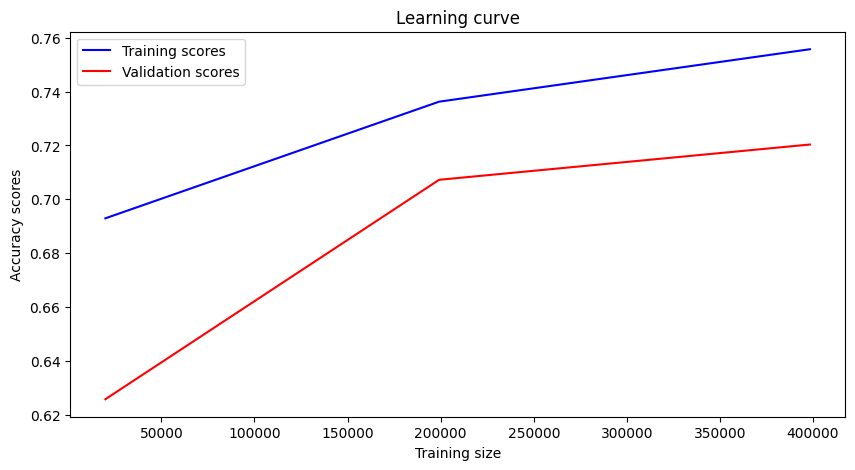

In [ ]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.5,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
x = final_model.cv_results_['param_model__max_depth'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [ ]:
print (f"x : {x}")
print (f"y_train_score : {y_train_score}")
print (f"y_val_score : {y_val_score}")

x : [18 18 18 18 18  6  6 18  6  6]
y_train_score : [0.80085984 0.71243118 0.73631701 0.71138185 0.71028225 0.57225181
 0.52118014 0.62166785 0.73330322 0.71639648]
y_val_score : [0.7304965  0.69242656 0.68861943 0.65188884 0.65261686 0.55624888
 0.49080355 0.58493595 0.70831655 0.70105754]


In [ ]:
#calculation of mean train and test scores from final_model.cv_results_

sum_train_score_6 = 0
sum_valid_score_6 = 0
sum_train_score_18 = 0
sum_valid_score_18 = 0

for i in range(len(x)):
  if (x[i] == 6):
    sum_train_score_6 = sum_train_score_6 + y_train_score[i]
    sum_valid_score_6 = sum_valid_score_6 + y_val_score[i]

  elif (x[i] == 18):
    sum_train_score_18 = sum_train_score_18 + y_train_score[i]
    sum_valid_score_18 = sum_valid_score_18 + y_val_score[i]

mean_train_score_6 = sum_train_score_6/4.0
mean_train_score_18 = sum_train_score_18/6.0
mean_valid_score_6 = sum_valid_score_6/4.0
mean_valid_score_18 = sum_valid_score_18/6.0

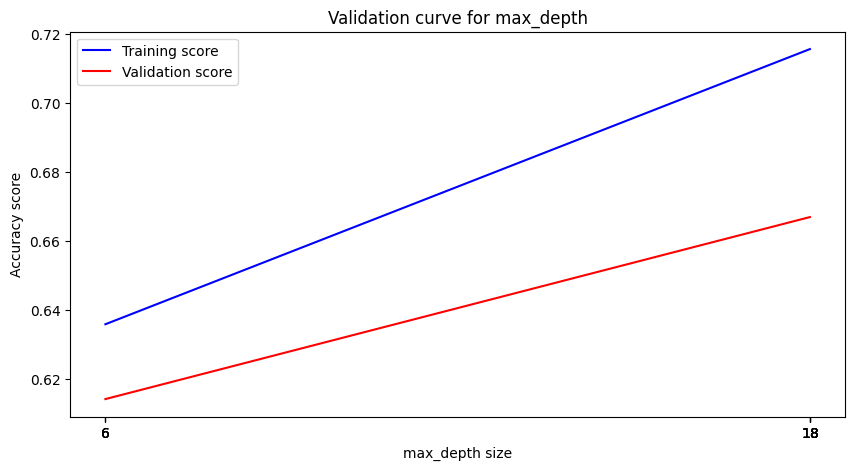

In [ ]:
#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,5))
plt.plot([6,18],[mean_train_score_6,mean_train_score_18],color="blue",label="Training score")
plt.plot([6,18],[mean_valid_score_6,mean_valid_score_18],color="red",label="Validation score")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("max_depth size")
plt.xticks(x)
plt.ylabel("Accuracy score")
plt.title("Validation curve for max_depth")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_dtc.append ((fit_time, predict_time))
current_RAM, peak_RAM = tracemalloc.get_traced_memory()

In [ ]:
y_predict

array([1, 2, 3, ..., 3, 2, 1])

In [ ]:
#Wall-clock fit and predict times, peak RAM usage:
print (f"Fit time for Decision Tree classifier: {clock_time_dtc[0][0]:0.2f} seconds")
print (f"Predict time for Decision Tree classifier: {clock_time_dtc[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for Decision Tree classifier: 2042.75 seconds
Predict time for Decision Tree classifier: 49.99 seconds
Peak RAM usage: 1993.17 MBs


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[ 6389,   633,   411,   155],
       [24615, 81652, 11402,  3212],
       [ 2081,  3083, 58398,  6504],
       [    7,    15,   148,   462]])

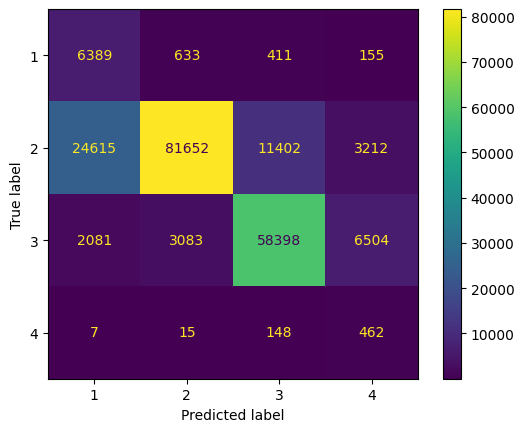

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict,average='micro')}")
print (f"Recall = {metrics.recall_score(y_test,y_predict,average='micro')}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict,average='micro')}")

Accuracy = 0.7375770082393167
Precision = 0.7375770082393167
Recall = 0.7375770082393167
F1 score = 0.7375770082393167


# Neural network:

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=1,max_iter=6,batch_size=512,early_stopping=True,shuffle=True,n_iter_no_change=2)
clock_time_mlp = [] #to report fit and predict times for Multilayer Perceptron classifier
tracemalloc.start()

In [ ]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",mlp)
])

In [ ]:
pipe.get_params().keys()


dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__activation', 'model__alpha', 'model__batch_size', 'model__beta_1', 'model__beta_2', 'model__early_stopping', 'model__epsilon', 'model__hidden_layer_sizes', 'model__learning_rate', 'model__learning_rate_init', 'model__max_fun', 'model__max_iter', 'model__momentum', 'model__n_iter_no_change', 'model__nesterovs_momentum', 'model__power_t', 'model__random_state', 'model__shuffle', 'model__solver', 'model__tol', 'model__validation_fraction', 'model__verbose', 'model__warm_start'])

In [ ]:
# Using RandomizedSearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__hidden_layer_sizes':[(512,512),(256,256,256,256,128,128,128,128)]
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
final_model.best_params_

{'model__hidden_layer_sizes': (512, 512)}

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


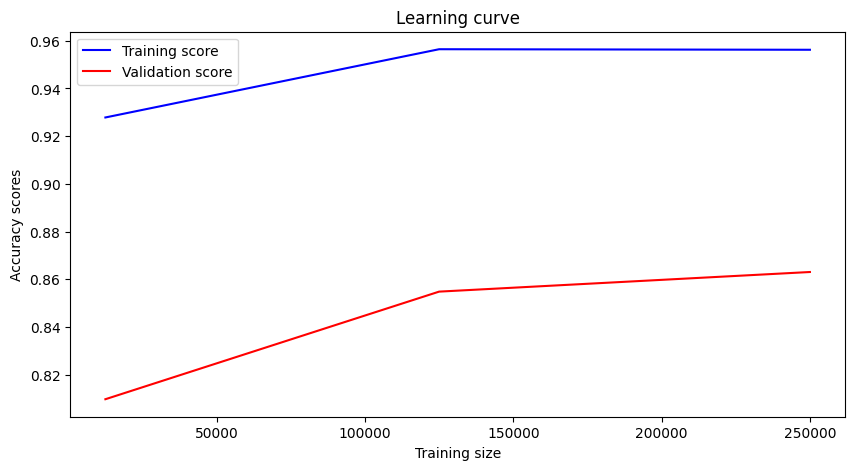

In [ ]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train[:500000],
    y=y_train[:500000],
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.5,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training score")
plt.plot(train_sizes, test_mean, color="red",label="Validation score")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
x = final_model.cv_results_['param_model__hidden_layer_sizes'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [ ]:
print (f"x: {x}")
print (f"y_train_score: {y_train_score}")
print (f"y_val_score: {y_val_score}")

x: [(512, 512) (256, 256, 256, 256, 128, 128, 128, 128)]
y_train_score: [0.95806643 0.96085432]
y_val_score: [0.86691771 0.86677587]


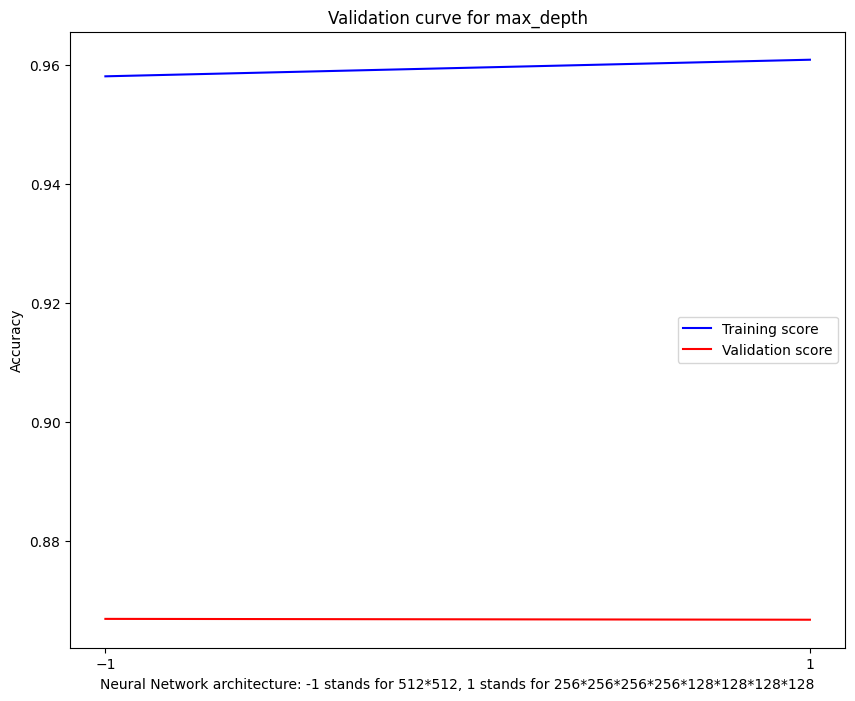

In [ ]:
#Plotting Validation curve/Model complexity curve for max_depth:
plt.figure(figsize=(10,8))
plt.plot([-1,1],y_train_score,color="blue",label="Training score")
plt.plot([-1,1],y_val_score,color="red",label="Validation score")
plt.xlabel("Neural Network architecture: -1 stands for 512*512, 1 stands for 256*256*256*256*128*128*128*128")
plt.xticks([-1,1])
plt.ylabel("Accuracy")
plt.title("Validation curve for max_depth")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_mlp.append ((fit_time, predict_time))
current_RAM, peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for Multi layer perceptron: {clock_time_mlp[0][0]:0.2f} seconds")
print (f"Predict time for Multi layer perceptron: {clock_time_mlp[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for Multi layer perceptron: 2183.22 seconds
Predict time for Multi layer perceptron: 65.85 seconds
Peak RAM usage: 2799.67 MBs


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[   564,   6565,    459,      0],
       [    74, 110373,  10432,      2],
       [     4,   6951,  63110,      1],
       [     0,     72,    556,      4]])

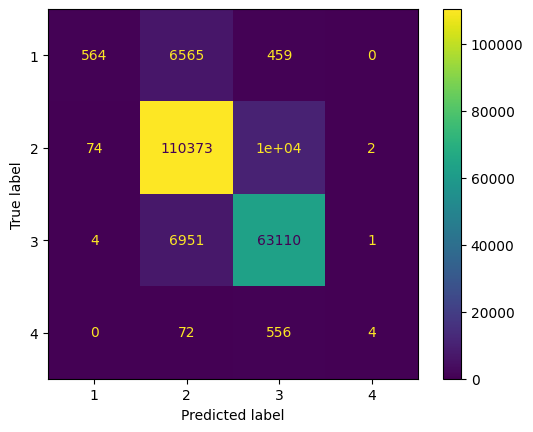

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict,average='micro')}")
print (f"Recall = {metrics.recall_score(y_test,y_predict,average='micro')}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict,average='micro')}")

Accuracy = 0.8738947717242315
Precision = 0.8738947717242315
Recall = 0.8738947717242315
F1 score = 0.8738947717242315


# k-NN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(algorithm='brute',metric='euclidean',n_jobs=-1)
clock_time_knc = [] #to report fit and predict times for K Neighbors classifier
tracemalloc.start()

In [ ]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",knc)
])

In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__algorithm', 'model__leaf_size', 'model__metric', 'model__metric_params', 'model__n_jobs', 'model__n_neighbors', 'model__p', 'model__weights'])

In [ ]:
# Using HalvingGridsearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__n_neighbors':[3,5,11,21],
    'model__metric':['euclidean','manhattan']
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
start_time = time.time()
final_model.fit(x_train[:50000],y_train[:50000])
fit_time = time.time() - start_time   #in seconds

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
final_model.best_params_

{'model__n_neighbors': 21, 'model__metric': 'manhattan'}

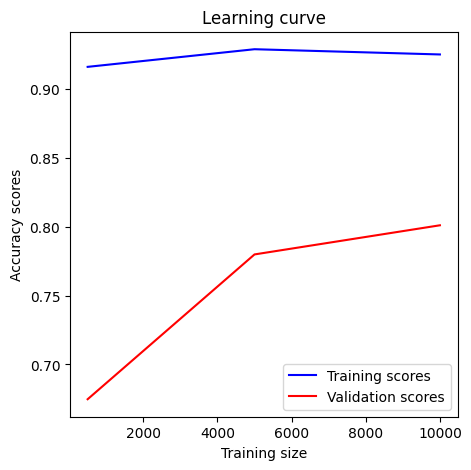

In [ ]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train[:20000],
    y=y_train[:20000],
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.5,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(5,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
x = final_model.cv_results_['param_model__n_neighbors'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [ ]:
print (f"x: {x}")
print (f"y_train_score: {y_train_score}")
print (f"y_val_score: {y_val_score}")

x: [ 3  5 11 21  3  5 11 21]
y_train_score: [0.90858 0.91238 0.9207  0.9218  0.9103  0.9184  0.92142 0.9213 ]
y_val_score: [0.79696 0.81056 0.82256 0.8268  0.80152 0.81514 0.8247  0.8274 ]


In [ ]:
#calculation of mean train and test scores from final_model.cv_results_

mean_train_scores = [0,0,0,0]
mean_val_scores = [0,0,0,0]

for i in range(4):
  mean_train_scores[i] = y_train_score[i] + y_train_score[i+4]
  mean_val_scores[i] = y_val_score[i] + y_val_score[i+4]

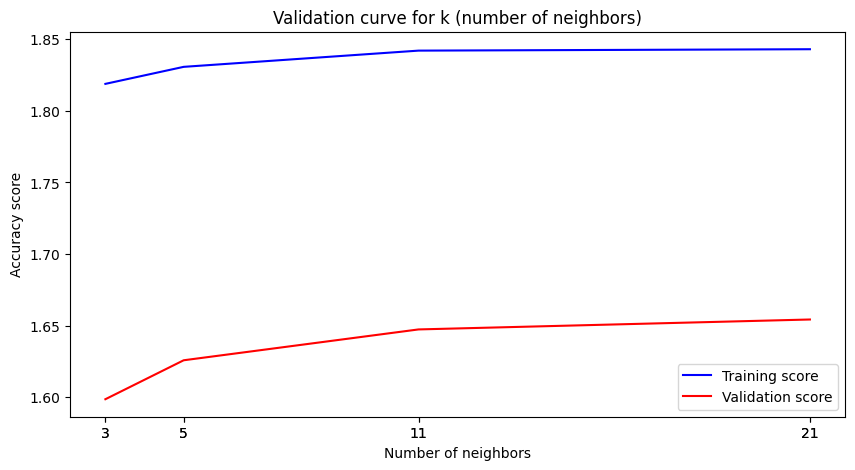

In [ ]:
#Plotting Validation curve/Model complexity curve for n_neighbors(k):

plt.figure(figsize=(10,5))
plt.plot([3,5,11,21],mean_train_scores,color="blue",label="Training score")
plt.plot([3,5,11,21],mean_val_scores,color="red",label="Validation score")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("Number of neighbors")
plt.xticks(x)
plt.ylabel("Accuracy score")
plt.title("Validation curve for k (number of neighbors)")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_knc.append ((fit_time, predict_time))
current_RAM, peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for K neighbors classifier: {clock_time_knc[0][0]:0.2f} seconds")
print (f"Predict time for K neighbors classifier: {clock_time_knc[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for K neighbors classifier: 1738.08 seconds
Predict time for K neighbors classifier: 2288.41 seconds
Peak RAM usage: 624.98 MBs


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[    86,   7012,    490,      0],
       [    93, 108579,  12209,      0],
       [     6,  10903,  59157,      0],
       [     1,    132,    499,      0]])

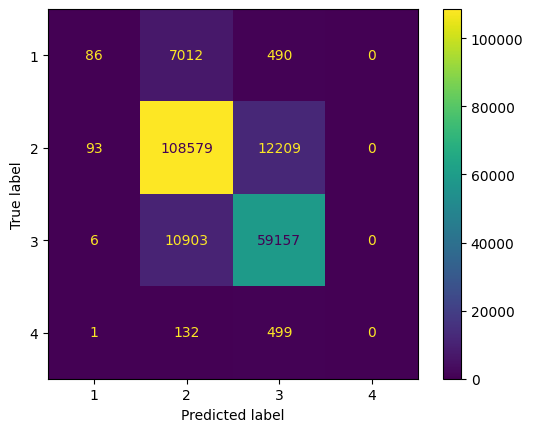

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict,average='micro')}")
print (f"Recall = {metrics.recall_score(y_test,y_predict,average='micro')}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict,average='micro')}")

Accuracy = 0.8426195102602339
Precision = 0.8426195102602339
Recall = 0.8426195102602339
F1 score = 0.8426195102602339


# SVM:

In [ ]:
sgdc = SGDClassifier(random_state=1,loss='hinge',shuffle=True,class_weight="balanced")
clock_time_sgdc = [] #to report fit and predict times for SGD Classifier
tracemalloc.start()

In [ ]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",sgdc)
])

In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__alpha', 'model__average', 'model__class_weight', 'model__early_stopping', 'model__epsilon', 'model__eta0', 'model__fit_intercept', 'model__l1_ratio', 'model__learning_rate', 'model__loss', 'model__max_iter', 'model__n_iter_no_change', 'model__n_jobs', 'model__penalty', 'model__power_t', 'model__random_state', 'model__shuffle', 'model__tol', 'model__validation_fraction', 'model__verbose', 'model__warm_start'])

In [ ]:
# Using GridSearchCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__alpha':[0.00001,0.0001,0.001]
}

final_model = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
start_time = time.time()
final_model.fit(x_train,y_train)
fit_time = time.time() - start_time   #in seconds

In [ ]:
final_model.best_params_

{'model__alpha': 0.001}

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


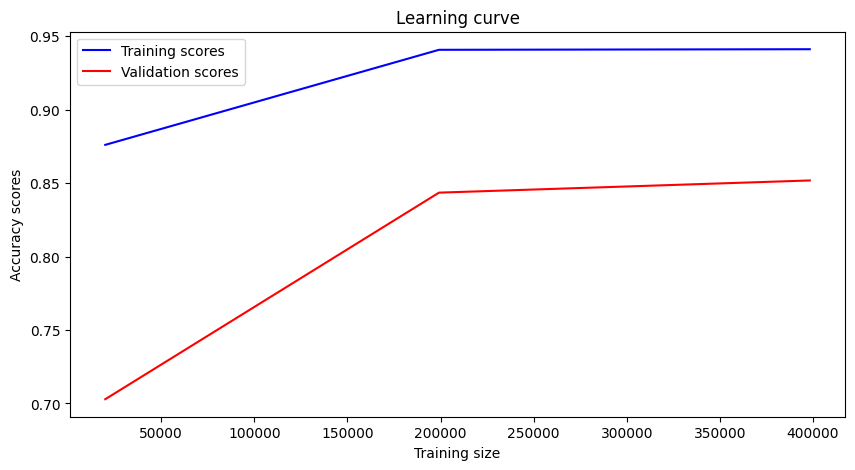

In [ ]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train,
    y=y_train,
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.5,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [ ]:
x = final_model.cv_results_['param_model__alpha'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [ ]:
print (f"x : {x}")
print (f"y_train_score : {y_train_score}")
print (f"y_val_score : {y_val_score}")

x : [1.e-05 1.e-04 1.e-03]
y_train_score : [0.93193249 0.94456014 0.93924925]
y_val_score : [0.82602854 0.8458524  0.85026705]


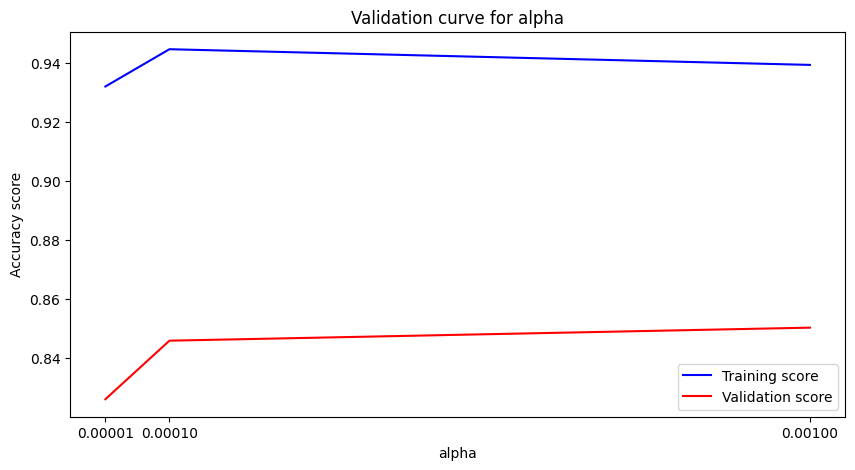

In [ ]:
#Plotting Validation curve/Model complexity curve for alpha:
plt.figure(figsize=(10,5))
plt.plot(x,y_train_score,color="blue",label="Training score")
plt.plot(x,y_val_score,color="red",label="Validation score")
#plt.plot(x[i],y_val_score[i],color="red",label="Validation error")
plt.xlabel("alpha")
plt.xticks(x)
plt.ylabel("Accuracy score")
plt.title("Validation curve for alpha")
plt.legend()
plt.show()

In [ ]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_sgdc.append ((fit_time, predict_time))
current_RAM, peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [ ]:
#Wall-clock fit and predict times
print (f"Fit time for SGD classifier: {clock_time_sgdc[0][0]:0.2f} seconds")
print (f"Predict time for SGD classifier: {clock_time_sgdc[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for SGD classifier: 806.07 seconds
Predict time for SGD classifier: 54.15 seconds
Peak RAM usage: 1993.14 MBs


In [ ]:
metrics.confusion_matrix(y_test,y_predict)

array([[  1236,   5836,    492,     24],
       [  1505, 107034,  11646,    696],
       [   260,   6249,  62120,   1437],
       [     5,     23,    365,    239]])

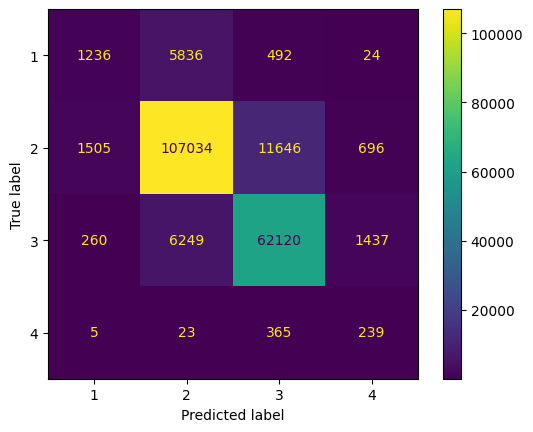

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [ ]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict,average='micro')}")
print (f"Recall = {metrics.recall_score(y_test,y_predict,average='micro')}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict,average='micro')}")

Accuracy = 0.8567132105218234
Precision = 0.8567132105218234
Recall = 0.8567132105218234
F1 score = 0.8567132105218234


**Kernel SVM (RBF):**

In [32]:
svc = SVC(kernel='rbf',random_state=1)
clock_time_svc = [] #to report fit and predict times for Support vector classification
tracemalloc.start()

In [33]:
pipe = Pipeline([
    ("encoder",TargetEncoder()),
    ("model",svc)
])

In [34]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'encoder', 'model', 'encoder__categories', 'encoder__cv', 'encoder__random_state', 'encoder__shuffle', 'encoder__smooth', 'encoder__target_type', 'model__C', 'model__break_ties', 'model__cache_size', 'model__class_weight', 'model__coef0', 'model__decision_function_shape', 'model__degree', 'model__gamma', 'model__kernel', 'model__max_iter', 'model__probability', 'model__random_state', 'model__shrinking', 'model__tol', 'model__verbose'])

In [35]:
# Using RandomizedCV to do hyperparameter tuning and Target encoding (of categorical features) with nested cross validation:

parameter_grid = {
    'model__C':[0.5,2,8],
    'model__gamma':['scale',1/50000,2/50000]
}

final_model = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    cv=2,
    refit=True,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True,
)

In [36]:
start_time = time.time()
final_model.fit(x_train[:20000],y_train[:20000])
fit_time = time.time() - start_time   #in seconds

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [37]:
final_model.best_params_

{'model__gamma': 'scale', 'model__C': 2}

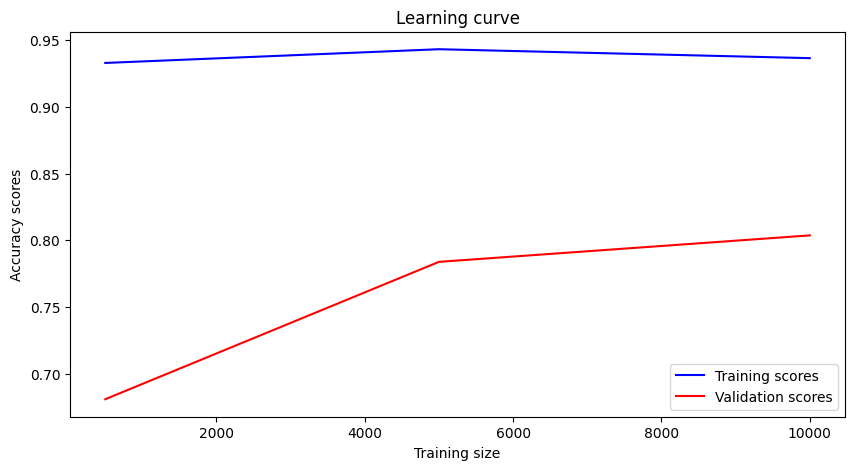

In [38]:
#Plotting Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_model,
    X=x_train[:20000],
    y=y_train[:20000],
    cv=2,
    scoring='accuracy',
    train_sizes=([0.05,0.5,1.]),
    shuffle=True,
    n_jobs=-1,
    random_state=1
)

#calculating the mean training and test score for each training size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

#Plot Learning curve
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color="blue",label="Training scores")
plt.plot(train_sizes, test_mean, color="red",label="Validation scores")
plt.xlabel("Training size")
plt.ylabel("Accuracy scores")
plt.title("Learning curve")
plt.legend()
plt.show()

In [39]:
x = final_model.cv_results_['param_model__C'].data
y_train_score = final_model.cv_results_['mean_train_score']
y_val_score = final_model.cv_results_['mean_test_score']

In [40]:
print (f"x : {x}")
print (f"y_train_score : {y_train_score}")
print (f"y_val_score : {y_val_score}")

x : [0.5 0.5 0.5 2.  2.  2.  8.  8.  8. ]
y_train_score : [0.9148  0.60625 0.60625 0.92515 0.60625 0.60625 0.94165 0.8187  0.91485]
y_val_score : [0.8022  0.60625 0.60625 0.80375 0.60625 0.60625 0.8035  0.66645 0.7618 ]


In [43]:
start_time = time.time()
y_predict = final_model.predict(x_test)
predict_time = time.time() - start_time  #in seconds

clock_time_svc.append ((fit_time, predict_time))
current_RAM, peak_RAM = tracemalloc.get_traced_memory()
tracemalloc.stop()

KeyboardInterrupt: 

In [44]:
#Wall-clock fit and predict times
print (f"Fit time for SVC: {clock_time_svc[0][0]:0.2f} seconds")
print (f"Predict time for SVC: {clock_time_svc[0][1]:0.2f} seconds")
print (f"Peak RAM usage: {peak_RAM/(1024*1024):0.2f} MBs")

Fit time for SVC: 873.38 seconds
Predict time for SVC: 508.20 seconds
Peak RAM usage: 427.20 MBs


In [45]:
metrics.confusion_matrix(y_test,y_predict)

array([[    47,   6979,    562,      0],
       [    14, 106990,  13877,      0],
       [    10,  13607,  56441,      8],
       [     0,    157,    474,      1]])

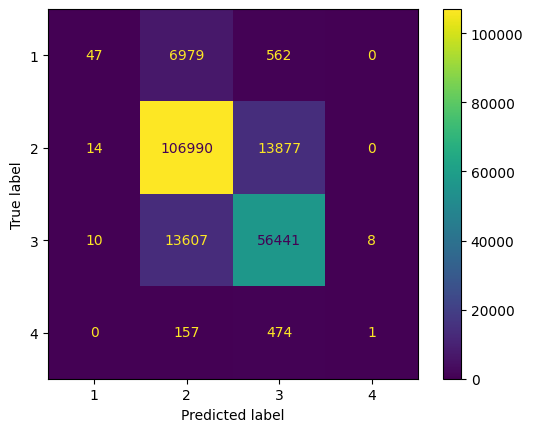

In [46]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [47]:
#Accuracy, Precision, Recall and F1 scores:

print (f"Accuracy = {metrics.accuracy_score(y_test,y_predict)}")
print (f"Precision = {metrics.precision_score(y_test,y_predict,average='micro')}")
print (f"Recall = {metrics.recall_score(y_test,y_predict,average='micro')}")
print (f"F1 score = {metrics.f1_score(y_test,y_predict,average='micro')}")

Accuracy = 0.8208136890147464
Precision = 0.8208136890147464
Recall = 0.8208136890147464
F1 score = 0.8208136890147464
